# Darshan Padaliya
##### Data Science & Business Analytics Intern at The Sparks Foundation

## Task-1 : Prediction using Supervised ML

### Simple Linear Regression using Pytorch

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Distribution of Scores 

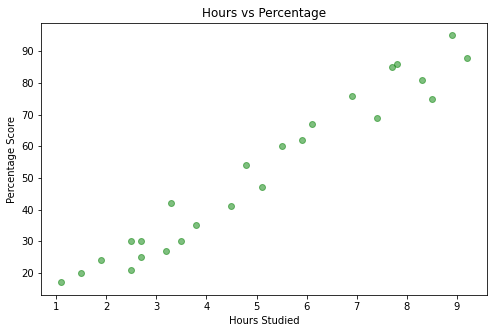

In [3]:
plt.figure(figsize=(8,5))
plt.plot('Hours', 'Scores', 'go', alpha=0.5, data=df) 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Preparing the data

Dividing the data into "attributes" (inputs) and "labels" (outputs)

In [4]:
X = df.iloc[:,0]
y = df.iloc[:,1]

Spliting data into tarin and test with sklearn

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

## Model building in Pytorch

In [6]:
import torch
import torch.nn as nn

class linearRegression(nn.Module):
    def __init__(self, inputSize=1, outputSize=1):
        super().__init__()
        self.linear = nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

Converting array into tensors

In [7]:
#### Converting Series to array 

X_train = X_train.values    
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


#### Converting array into tensors

X_train = torch.FloatTensor(X_train)
X_train = torch.reshape(X_train,(-1,1))
X_test = torch.FloatTensor(X_test)
X_test = torch.reshape(X_test,(-1,1))
y_train = torch.FloatTensor(y_train)
y_train = torch.reshape(y_train,(-1,1))
y_test = torch.FloatTensor(y_test)
y_test = torch.reshape(y_test,(-1,1))

## Instantiating the model

In [8]:
learningRate = 0.001 
epochs = 100
model = linearRegression()
model.parameters

<bound method Module.parameters of linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)>

For Backward Propogation-- Defining the loss_function and the optimizer

In [9]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

## Model Training

In [10]:
final_losses=[]

for i in range(epochs):
    # Clearing gradient buffers
    optimizer.zero_grad()
    
    # Output from model
    outputs = model(X_train)
    
    # Calculating loss
    loss = criterion(outputs, y_train)
    
    # Calculating gradients w.r.t to parameters
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    final_losses.append(loss.detach().numpy())
    i = i+1
    if i%10==0:
        print(f"Epoch number: {i} and the loss : {loss}")

Epoch number: 10 and the loss : 805.7545776367188
Epoch number: 20 and the loss : 216.6938934326172
Epoch number: 30 and the loss : 75.4527587890625
Epoch number: 40 and the loss : 41.5866584777832
Epoch number: 50 and the loss : 33.46644592285156
Epoch number: 60 and the loss : 31.51936912536621
Epoch number: 70 and the loss : 31.052490234375
Epoch number: 80 and the loss : 30.940502166748047
Epoch number: 90 and the loss : 30.913610458374023
Epoch number: 100 and the loss : 30.907129287719727


Text(0.5, 0, 'Epoch')

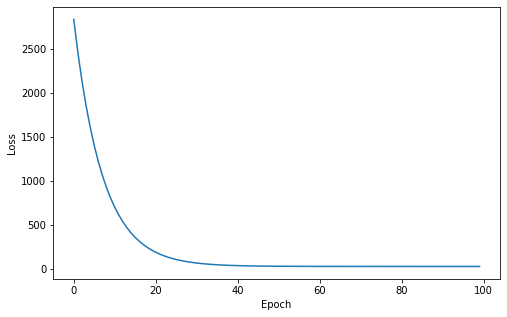

In [11]:
plt.figure(figsize=(8,5))
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

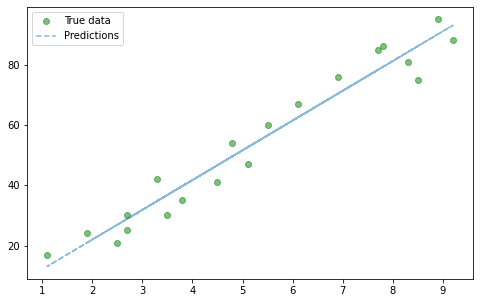

In [12]:
plt.figure(figsize=(8,5))
predicted = model(X_train).detach().numpy()
plt.plot(X_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(X_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

## Making Predictions
First we will predict our test data

In [13]:
y_pred = model(X_test)
y_pred = y_pred.detach().numpy().squeeze()
y_test = y_test.detach().numpy().squeeze()
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred},index=[0,1,2,3,4])
result

,Actual,Predicted
0,20.0,17.020821
1,27.0,33.805302
2,69.0,75.272835
3,30.0,26.894043
4,62.0,60.463001


We can get prediction of our own data too

In [14]:
hours = torch.FloatTensor([9.25])
own_pred = model(hours)
print(f"No of Hours = {hours.squeeze()}")
print(f"Predicted Score = {own_pred.squeeze()}")

No of Hours = 9.25
Predicted Score = 93.53829956054688


## Evaluating the model


In [15]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

print('Mean Squared Error:', MSE(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(MSE(y_test, y_pred)))
print('Mean Absolute Error:', MAE(y_test, y_pred))

Mean Squared Error: 21.309088
Root Mean Squared Error: 4.6161766
Mean Absolute Error: 4.140054
